In [40]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import sys
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [41]:
mnist_train = datasets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                          train=True, # True를 지정하면 훈련 데이터로 다운로드
                          transform=transforms.ToTensor(), # 텐서로 변환
                          download=True)

mnist_test = datasets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                         train=False, # False를 지정하면 테스트 데이터로 다운로드
                         transform=transforms.ToTensor(), # 텐서로 변환
                         download=True)

data_loader = DataLoader(dataset=mnist_train,
                         batch_size=128,
                         shuffle=True,
                         drop_last=True)

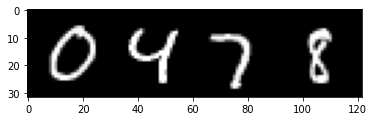

0  4  7  8


In [4]:
def imshow(img):
    plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))
    plt.show()
    
batch_size = 4
trainloader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size,shuffle=True, num_workers=2)
dataiter = iter(trainloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('  '.join(f'{labels[j]}' for j in range(batch_size)))

In [5]:
image, label = next(iter(trainloader))
print(image.shape, label.shape)

torch.Size([4, 1, 28, 28]) torch.Size([4])


In [6]:
class CNN(nn.Module):
    def __init__(self, activation_function, pooling):
        super().__init__()
        self.layer1 = nn.Sequential(
                        nn.Conv2d(1, 32, 3, 1, 1),
                        getattr(nn.modules.activation, activation_function)(),
                        getattr(nn, pooling)(2)
        )
        self.layer2 = nn.Sequential(
                        nn.Conv2d(32, 64, 3, 1, 1),
                        getattr(nn.modules.activation, activation_function)(),
                        getattr(nn, pooling)(2)
        )
        self.linear = nn.Linear(7*7*64, 10)
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.view(x.size(0), -1)
        x = self.linear(x)
        return x


In [46]:
class CNN_EXPAND(nn.Module):
  def __init__(self, activation_function, pooling):
      super().__init__()
      self.layer1 = nn.Sequential(
                      nn.Conv2d(1, 32, 3, 1, 1),
                      getattr(nn.modules.activation, activation_function)(),
                      getattr(nn, pooling)(2)
      )
      self.layer2 = nn.Sequential(
                      nn.Conv2d(32, 64, 3, 1, 1),
                      getattr(nn.modules.activation, activation_function)(),
                      getattr(nn, pooling)(2)
      )
      self.layer3 = nn.Sequential(
                      nn.Conv2d(64, 128, 3, 1, 1),
                      getattr(nn.modules.activation, activation_function)(),
                      getattr(nn, pooling)(2)
      )
      self.linear = nn.Linear(3*3*128, 10)
  
  def forward(self, x):
      x = self.layer1(x)
      x = self.layer2(x)
      x = self.layer3(x)
      x = x.view(x.size(0), -1)
      x = self.linear(x)
      return x
  

In [43]:
def model_learn(name, activation_function, pooling):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model = CNN_EXPAND(activation_function, pooling).to(device)
    criterion = nn.CrossEntropyLoss().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    
    print("[+] Train Start")
    total_epochs = 20
    total_batch = len(data_loader)
    for epoch in range(total_epochs):
        avg_cost = 0
        for x, y in data_loader:
            x = x.to(device)
            y = y.to(device)
            y_pred = model(x)

            cost = criterion(y_pred, y)
            optimizer.zero_grad()
            cost.backward()
            optimizer.step()

            avg_cost += cost
        avg_cost /= total_batch

        print("Epoch: %d, Cost: %f" % (epoch, avg_cost))

    print("[+] Test Start")
    x = mnist_test.data.view(len(mnist_test), 1, 28, 28).float().to(device)
    y = mnist_test.targets.to(device)
    y_pred = model(x)
    correct = torch.argmax(y_pred, 1) == y
    accuracy = correct.float().mean()
    print("[+] Accuracy ", name, " : ", accuracy.item())

In [37]:
model_learn('cnn_relu_maxpulling', 'ReLU', 'MaxPool2d')

[+] Train Start
Epoch: 0, Cost: 0.234491
Epoch: 1, Cost: 0.052678
Epoch: 2, Cost: 0.037118
Epoch: 3, Cost: 0.028377
Epoch: 4, Cost: 0.022027
Epoch: 5, Cost: 0.018454
Epoch: 6, Cost: 0.014969
Epoch: 7, Cost: 0.012928
Epoch: 8, Cost: 0.011705
Epoch: 9, Cost: 0.009041
Epoch: 10, Cost: 0.009108
Epoch: 11, Cost: 0.006530
Epoch: 12, Cost: 0.006625
Epoch: 13, Cost: 0.008634
Epoch: 14, Cost: 0.005248
Epoch: 15, Cost: 0.003029
Epoch: 16, Cost: 0.005118
Epoch: 17, Cost: 0.005402
Epoch: 18, Cost: 0.004692
Epoch: 19, Cost: 0.002863
[+] Test Start
[+] Accuracy  cnn_relu_maxpulling  :  0.9932000041007996


In [38]:
model_learn('cnn_relu_maxpulling', 'ReLU', 'AvgPool2d')

[+] Train Start
Epoch: 0, Cost: 0.380071
Epoch: 1, Cost: 0.097377
Epoch: 2, Cost: 0.072327
Epoch: 3, Cost: 0.058098
Epoch: 4, Cost: 0.046811
Epoch: 5, Cost: 0.040995
Epoch: 6, Cost: 0.034905
Epoch: 7, Cost: 0.031105
Epoch: 8, Cost: 0.028060
Epoch: 9, Cost: 0.024868
Epoch: 10, Cost: 0.022779
Epoch: 11, Cost: 0.021314
Epoch: 12, Cost: 0.018728
Epoch: 13, Cost: 0.016840
Epoch: 14, Cost: 0.015508
Epoch: 15, Cost: 0.014201
Epoch: 16, Cost: 0.013442
Epoch: 17, Cost: 0.011976
Epoch: 18, Cost: 0.010916
Epoch: 19, Cost: 0.009667
[+] Test Start
[+] Accuracy  cnn_relu_maxpulling  :  0.9890999794006348


In [47]:
model_learn('cnn_relu_maxpulling', 'ReLU', 'AdaptiveMaxPool2d')

[+] Train Start
Epoch: 0, Cost: 0.619832
Epoch: 1, Cost: 0.225378
Epoch: 2, Cost: 0.170107
Epoch: 3, Cost: 0.140719
Epoch: 4, Cost: 0.126771
Epoch: 5, Cost: 0.113152
Epoch: 6, Cost: 0.103930
Epoch: 7, Cost: 0.093648
Epoch: 8, Cost: 0.086875
Epoch: 9, Cost: 0.082205
Epoch: 10, Cost: 0.075706
Epoch: 11, Cost: 0.072288
Epoch: 12, Cost: 0.065557
Epoch: 13, Cost: 0.060579
Epoch: 14, Cost: 0.057331
Epoch: 15, Cost: 0.054193
Epoch: 16, Cost: 0.051207
Epoch: 17, Cost: 0.048380
Epoch: 18, Cost: 0.046286
Epoch: 19, Cost: 0.042372
[+] Test Start
[+] Accuracy  cnn_relu_maxpulling  :  0.2994999885559082
